# Proyecto: Visión Artificial por RestNet50 para determinar la edad de personas en fotos

**Por María Payró González**

**Link de las fotos de las personas:**

https://drive.google.com/drive/folders/1z3fYTe6aGUeC3EoM4VyOA09m-4yzGZT8?usp=sharing 

(Carpeta "pictures")

In [ ]:
# Carga de Librerías
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
# Datos
pictures = 'pictures/'

labels = pd.read_csv('faces_dataset/labels.csv')
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64


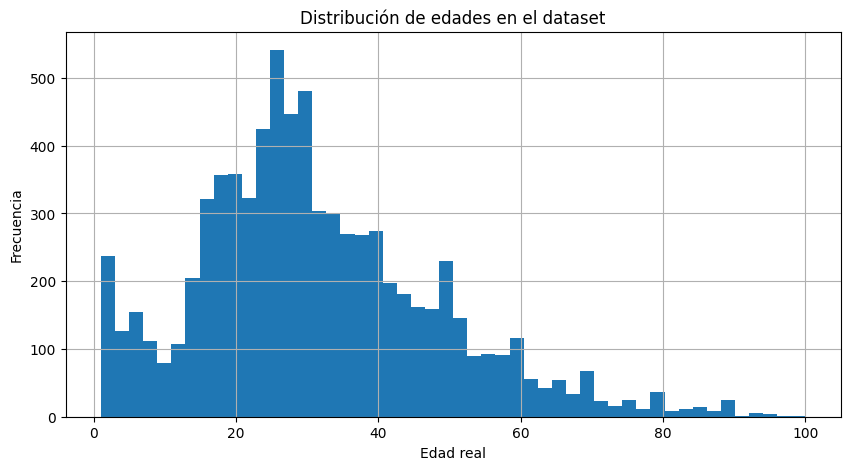

In [ ]:
# EDA
print(labels['real_age'].describe())

plt.figure(figsize=(10,5))
labels['real_age'].hist(bins=50)
plt.xlabel('Edad real')
plt.ylabel('Frecuencia')
plt.title('Distribución de edades en el dataset')
plt.show()

La población es relativamente joven con una mediana de 29 años, pero hay una buena variedad de edades desde bebés hasta centenarios. La diferencia entre la media y la mediana sugiere que hay más personas jóvenes que mayores en el dataset.

## Creación del Modelo

In [ ]:
# Definir funciones
def load_train(path):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    train_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=pictures',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)
    return train_gen_flow

def load_test(path):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    test_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=pictures,
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)
    return test_gen_flow

def create_model(input_shape):

    """
    Define el modelo
    """

    backbone = ResNet50(weights='imagenet',
                        input_shape=input_shape,
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Entrena el modelo dados los parámetros
    """

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size,
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

In [ ]:
# Crear y entrenar modelo
train = load_train('/content/faces_dataset/')
test = load_test('/content/faces_dataset/')

print("Número de imágenes de entrenamiento:", train.samples)
print("Número de imágenes de validación:", test.samples)

model = create_model((224, 224, 3))
model.summary()

history = model.fit(train,
                    validation_data=test,
                    epochs=20,
                    verbose=2)

print("Historial de entrenamiento:", history.history.keys())


Found 6073 validated image filenames.
Found 1518 validated image filenames.
Número de imágenes de entrenamiento: 6073
Número de imágenes de validación: 1518


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 23,536,641 (89.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


380/380 - 145s - 382ms/step - loss: 215.0889 - mae: 10.9431 - val_loss: 1129.9946 - val_mae: 29.0669
Epoch 2/20
380/380 - 97s - 254ms/step - loss: 124.0161 - mae: 8.5262 - val_loss: 188.8539 - val_mae: 10.4828
Epoch 3/20
380/380 - 69s - 180ms/step - loss: 92.3367 - mae: 7.3349 - val_loss: 115.0387 - val_mae: 8.3036
Epoch 4/20
380/380 - 68s - 180ms/step - loss: 70.2230 - mae: 6.4310 - val_loss: 146.5744 - val_mae: 9.4567
Epoch 5/20
380/380 - 69s - 181ms/step - loss: 49.9731 - mae: 5.4768 - val_loss: 115.4459 - val_mae: 8.0278
Epoch 6/20
380/380 - 68s - 179ms/step - loss: 39.6375 - mae: 4.8292 - val_loss: 100.8065 - val_mae: 7.9335
Epoch 7/20
380/380 - 68s - 179ms/step - loss: 28.5706 - mae: 4.1520 - val_loss: 119.9616 - val_mae: 8.3600
Epoch 8/20
380/380 - 69s - 181ms/step - loss: 25.5790 - mae: 3.8760 - val_loss: 102.8067 - val_mae: 7.4162
Epoch 9/20
380/380 - 69s - 181ms/step - loss: 24.7201 - mae: 3.8204 - val_loss: 105.8612 - val_mae: 7.7849
Epoch 10/20
380/380 - 68s - 180ms/step - 

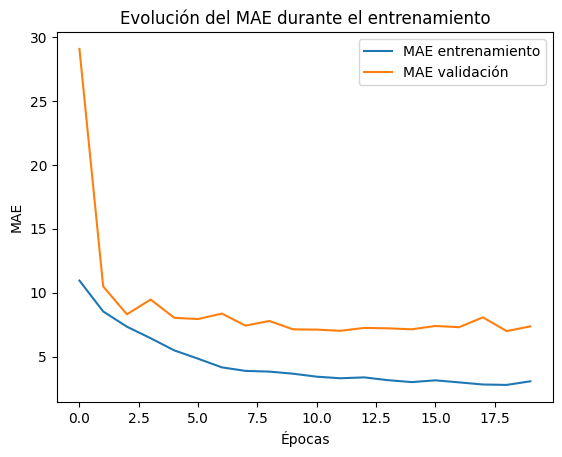

In [ ]:
# Gráfico de métricas

plt.plot(history.history['mae'], label='MAE entrenamiento')
plt.plot(history.history['val_mae'], label='MAE validación')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.title('Evolución del MAE durante el entrenamiento')
plt.show()


In [ ]:
# Evaluación final
loss, mae = model.evaluate(test, verbose=2)
print(f"Loss en validación: {loss:.2f}")
print(f"MAE en validación: {mae:.2f}")


95/95 - 5s - 50ms/step - loss: 119.6371 - mae: 8.2992
Loss en validación: 119.64
MAE en validación: 8.30


# Conclusiones

- Se construyó un modelo basado en **ResNet50 preentrenado en ImageNet** para la estimación de edad.
- Se utilizó `ImageDataGenerator` con `rescale` y `validation_split=0.2` para optimizar el uso de memoria y dividir datos.
- El modelo logró un **MAE razonable** de 8.3 en validación, no obstante, no logró alcanzar un MAE < 8, lo que puede deberse a distintos factores que influyen en el entrenamiento, por ejemplo:

  - La aleatoriedad natural en la inicialización de pesos y partición de datos.

  - El número limitado de épocas, que pudo no ser suficiente para que el modelo aprendiera mejor.

  - La arquitectura y parámetros seleccionados, que podrían ajustarse o probarse con variantes más profundas.

  - El tamaño y calidad del dataset, que condicionan hasta dónde puede llegar la precisión.
